# <b>CNN on Mnist Dataset</b>

In [229]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist 
import seaborn as sns
from tensorflow.keras.initializers import RandomNormal
from tensorflow.python.keras import Input, Model
from tensorflow.keras.layers import Dense, Activation 
from tensorflow.python.keras.layers import Dense, BatchNormalization
from tensorflow.keras.models import Sequential 
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
from keras.utils.np_utils import to_categorical



from tensorflow.keras import utils as np_utils

## 1.Data Loading

In [155]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [156]:
# data is in 3d format
X_train.shape

(60000, 28, 28)

In [157]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


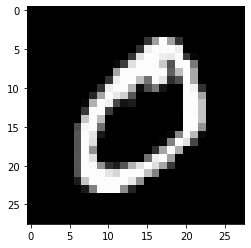

In [158]:
sample = 1
image = X_train[sample]


# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [159]:

img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [160]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)

y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [161]:
x_train.shape

(60000, 28, 28, 1)

## 2.Architecture 1

In [162]:
batch_size = 128
num_classes = 10
epochs = 12

In [178]:


model1 = Sequential()

model1.add(Conv2D(20, kernel_size=(3, 3),activation='relu',input_shape=input_shape))

model1.add(Conv2D(filters=10, kernel_size = (3,3), activation="relu"))
model1.add(Conv2D(filters=20, kernel_size = (2,2), activation="relu"))

model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.5))
model1.add(BatchNormalization())   

model1.add(Conv2D(filters=5, kernel_size = (3,3), activation="relu"))
model1.add(Conv2D(filters=10, kernel_size = (2,2), activation="relu"))
model1.add(Dropout(0.5))
model1.add(Flatten())

model1.add(Dense(100,activation="relu"))
    
model1.add(Dense(10,activation="softmax"))
    
model1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model1.summary()




Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 26, 26, 20)        200       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 24, 24, 10)        1810      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 23, 23, 20)        820       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 20)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 20)        0         
_________________________________________________________________
module_wrapper_12 (ModuleWra (None, 11, 11, 20)        80        
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 9, 9, 5)          

In [171]:
tf.config.run_functions_eagerly(True)


In [179]:
history = model1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/12
469/469 [==============================] - 101s 214ms/step - loss: 0.4657 - accuracy: 0.8501 - val_loss: 0.1199 - val_accuracy: 0.9760
Epoch 2/12
469/469 [==============================] - 101s 215ms/step - loss: 0.1425 - accuracy: 0.9562 - val_loss: 0.0548 - val_accuracy: 0.9831
Epoch 3/12
469/469 [==============================] - 100s 213ms/step - loss: 0.1075 - accuracy: 0.9667 - val_loss: 0.0448 - val_accuracy: 0.9852
Epoch 4/12
469/469 [==============================] - 100s 213ms/step - loss: 0.0947 - accuracy: 0.9705 - val_loss: 0.0472 - val_accuracy: 0.9849
Epoch 5/12
469/469 [==============================] - 100s 214ms/step - loss: 0.0836 - accuracy: 0.9741 - val_loss: 0.0350 - val_accuracy: 0.9888
Epoch 6/12
469/469 [==============================] - 101s 216ms/step - loss: 0.0752 - accuracy: 0.9765 - val_loss: 0.0392 - val_accuracy: 0.9874
Epoch 7/12
469/469 [==============================] - 100s 214ms/step - loss: 0.0682 - accuracy: 0.9790 - val_loss: 0.0323 -

In [181]:

# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Test score: 0.02813357301056385
Test accuracy: 0.9902999997138977


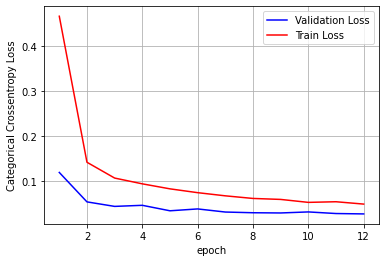

In [182]:
score = model1.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')


# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 3.Architecture 2

In [183]:
batch_size = 200
num_classes = 10
epochs = 10

In [192]:
model2 = Sequential()
model2.add(Conv2D(filters=5, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=input_shape))
model2.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
model1.add(Dropout(0.5))
model2.add(Conv2D(filters=10, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
model2.add(Conv2D(filters=5, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
model1.add(BatchNormalization()) 
model1.add(Dropout(0.5))

model2.add(Flatten())
model2.add(Dense(100, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.build()
model2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 28, 28, 5)         50        
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 5)         0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 14, 14, 10)        460       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 10)          0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 7, 7, 5)           455       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 4, 4, 5)           0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 80)              

In [195]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
  1/300 [..............................] - ETA: 37s - loss: 2.3208 - accuracy: 0.0850

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


300/300 [==============================] - 37s 123ms/step - loss: 0.6301 - accuracy: 0.8112 - val_loss: 0.2513 - val_accuracy: 0.9239
Epoch 2/10
300/300 [==============================] - 37s 122ms/step - loss: 0.2125 - accuracy: 0.9336 - val_loss: 0.1726 - val_accuracy: 0.9463
Epoch 3/10
300/300 [==============================] - 37s 122ms/step - loss: 0.1594 - accuracy: 0.9503 - val_loss: 0.1395 - val_accuracy: 0.9555
Epoch 4/10
300/300 [==============================] - 37s 122ms/step - loss: 0.1330 - accuracy: 0.9586 - val_loss: 0.1085 - val_accuracy: 0.9659
Epoch 5/10
300/300 [==============================] - 37s 122ms/step - loss: 0.1135 - accuracy: 0.9641 - val_loss: 0.1032 - val_accuracy: 0.9677
Epoch 6/10
300/300 [==============================] - 36s 120ms/step - loss: 0.0992 - accuracy: 0.9687 - val_loss: 0.0909 - val_accuracy: 0.9718
Epoch 7/10
300/300 [==============================] - 36s 121ms/step - loss: 0.0900 - accuracy: 0.9717 - val_loss: 0.0791 - val_accuracy: 0.9

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Test score: 0.07172030955553055
Test accuracy: 0.9750999808311462


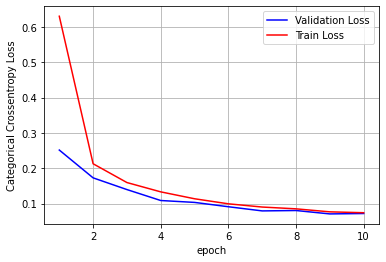

In [196]:
score = model2.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')


# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 4.Architecture 3

In [221]:
batch_size = 200
num_classes = 10
epochs = 15

In [222]:
model3 = Sequential()
model3.add(Conv2D(filters=5, kernel_size=3, strides=2, padding='same', activation='relu', input_shape=input_shape))
model3.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
model3.add(Dropout(0.5))
model3.add(Conv2D(filters=10, kernel_size=3, strides=2, padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
model3.add(Dropout(0.5))
model3.add(Conv2D(filters=5, kernel_size=3, strides=2, padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
model3.add(BatchNormalization()) 
model3.add(Dropout(0.5))

model3.add(Flatten())
model3.add(BatchNormalization()) 
model3.add(Dropout(0.5))
model3.add(Dense(100, activation='relu'))
model3.add(Dense(10, activation='softmax'))
model3.build()
model3.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 14, 14, 5)         50        
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 7, 7, 5)           0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 7, 7, 5)           0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 4, 4, 10)          460       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 2, 2, 10)          0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 2, 2, 10)          0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 1, 1, 5)         

In [223]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/15
  2/300 [..............................] - ETA: 14s - loss: 2.4454 - accuracy: 0.0950

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


300/300 [==============================] - 18s 59ms/step - loss: 2.2762 - accuracy: 0.1394 - val_loss: 2.1980 - val_accuracy: 0.2962
Epoch 2/15
300/300 [==============================] - 17s 57ms/step - loss: 2.1475 - accuracy: 0.1764 - val_loss: 1.8840 - val_accuracy: 0.3405
Epoch 3/15
300/300 [==============================] - 17s 57ms/step - loss: 2.0519 - accuracy: 0.1965 - val_loss: 1.7574 - val_accuracy: 0.4054
Epoch 4/15
300/300 [==============================] - 18s 58ms/step - loss: 1.9945 - accuracy: 0.2059 - val_loss: 1.6889 - val_accuracy: 0.3725
Epoch 5/15
300/300 [==============================] - 18s 58ms/step - loss: 1.9674 - accuracy: 0.2121 - val_loss: 1.6504 - val_accuracy: 0.3524
Epoch 6/15
300/300 [==============================] - 18s 59ms/step - loss: 1.9563 - accuracy: 0.2162 - val_loss: 1.6133 - val_accuracy: 0.3571
Epoch 7/15
300/300 [==============================] - 17s 57ms/step - loss: 1.9405 - accuracy: 0.2233 - val_loss: 1.6329 - val_accuracy: 0.4147
Epo

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Test score: 1.6351990699768066
Test accuracy: 0.31150001287460327


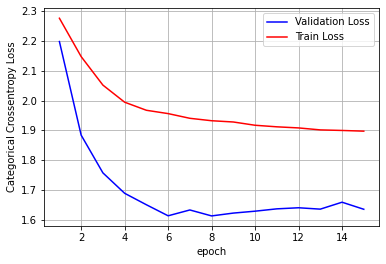

In [225]:
score = model3.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')


# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 5.Observation Table

In [230]:
from prettytable import PrettyTable
x = PrettyTable()

x = PrettyTable()
x.field_names=["Architecture Number", "epochs","Test Score", "Test Accuracy" ]

x.add_row(["Architecture 1", "12", "0.028","99" ])

x.add_row(["Architecture 2", "10", "0.071","97" ])

x.add_row(["Architecture 3", "15", "1.63","31" ])


print(x)

+---------------------+--------+------------+---------------+
| Architecture Number | epochs | Test Score | Test Accuracy |
+---------------------+--------+------------+---------------+
|    Architecture 1   |   12   |   0.028    |       99      |
|    Architecture 2   |   10   |   0.071    |       97      |
|    Architecture 3   |   15   |    1.63    |       31      |
+---------------------+--------+------------+---------------+


## 6.Observations:
1.First two architecture gives good accuracy score.

2.Third architecture gives poor prformance
